#  Análise de Dados dos Restaurantes da Zomato

Este projeto tem como objetivo explorar uma base de dados da Zomato para entender o cenário gastronômico da cidade de Bangalore, na Índia. Utilizando Python e bibliotecas de análise de dados, realizamos uma análise exploratória completa para identificar padrões, comportamentos e características dos restaurantes cadastrados na plataforma.

##  O que você vai encontrar aqui:

- Limpeza e tratamento dos dados com foco em qualidade da informação
- Análise dos principais tipos de culinária oferecidos
- Distribuição de avaliações e notas dos restaurantes
- Relação entre tipo de restaurante e faixa de preço
- Frequência dos restaurantes mais populares por localização
- Entre outros insights relevantes para negócios da área de food service

O intuito desse projeto é praticar habilidades de análise de dados com foco em negócios reais, além de gerar um case prático para portfólio. Todos os gráficos, análises e conclusões estão comentados ao longo do notebook.

---

📌 **Ferramentas utilizadas:**  
Python • Pandas • Matplotlib • Seaborn • Jupyter Notebook

**Base de dados:**  
Zomato Restaurants — disponível no [Kaggle](https://www.kaggle.com/datasets/rishikeshkonapure/zomato)



In [1]:
# importando bibliotecas 
import pandas as pd
import numpy as np

In [2]:
# importa arquivo csv e iniciar as primeiras analises
caminho = r"C:\Users\adriel\OneDrive\pandas\port analise dados\2\base\zomato.csv"
df = pd.read_csv(caminho, encoding='utf-8')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           7105 non-null   int64  
 1   Unnamed: 0             7105 non-null   int64  
 2   restaurant name        7105 non-null   object 
 3   restaurant type        7105 non-null   object 
 4   rate (out of 5)        7037 non-null   float64
 5   num of ratings         7105 non-null   int64  
 6   avg cost (two people)  7048 non-null   float64
 7   online_order           7105 non-null   object 
 8   table booking          7105 non-null   object 
 9   cuisines type          7105 non-null   object 
 10  area                   7105 non-null   object 
 11  local address          7105 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 666.2+ KB


,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [3]:
# configurando nomes das colunas
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
df.columns = ['nome_restaurante', 'tipo_restaurante', 'avaliacao_5_pontos', 'num_avaliacoes', 'custo_medio_2_pessoas', 'pedido_online',
              'reserva_mesa', 'tipo_cozinha', 'bairro_(ou_regiao)', 'endereco']
print(df.shape)

(7105, 10)


In [4]:
# conferindo os tipos de dados
display(df.head())
display(df.dtypes)

,nome_restaurante,tipo_restaurante,avaliacao_5_pontos,num_avaliacoes,custo_medio_2_pessoas,pedido_online,reserva_mesa,tipo_cozinha,bairro_(ou_regiao),endereco
0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


nome_restaurante          object
tipo_restaurante          object
avaliacao_5_pontos       float64
num_avaliacoes             int64
custo_medio_2_pessoas    float64
pedido_online             object
reserva_mesa              object
tipo_cozinha              object
bairro_(ou_regiao)        object
endereco                  object
dtype: object

In [5]:
# valores duplicados
df.duplicated().sum()

0

In [6]:
# valores nulos
df.isnull().sum()

nome_restaurante          0
tipo_restaurante          0
avaliacao_5_pontos       68
num_avaliacoes            0
custo_medio_2_pessoas    57
pedido_online             0
reserva_mesa              0
tipo_cozinha              0
bairro_(ou_regiao)        0
endereco                  0
dtype: int64

In [7]:
# verificar se o tipo esta correto
df['avaliacao_5_pontos'] = pd.to_numeric(df['avaliacao_5_pontos'], errors='coerce')
df['custo_medio_2_pessoas'] = pd.to_numeric(df['custo_medio_2_pessoas'], errors='coerce')
df['avaliacao_5_pontos'] = df['avaliacao_5_pontos'].astype('float')
df['custo_medio_2_pessoas'] = df['custo_medio_2_pessoas'].astype('float')
df['pedido_online'] = df['pedido_online'].astype('category')
df['reserva_mesa'] = df['reserva_mesa'].astype('category')

# calculo da mediana
ava_5_med = np.percentile(df['avaliacao_5_pontos'].dropna(), 50)
custo_medio_med = np.percentile(df['custo_medio_2_pessoas'].dropna(), 50)

# Preenche os nulos
df['avaliacao_5_pontos'] = df['avaliacao_5_pontos'].fillna(ava_5_med)
df['custo_medio_2_pessoas'] = df['custo_medio_2_pessoas'].fillna(custo_medio_med)

# verificação
print(df['avaliacao_5_pontos'].isnull().sum())
print(df['custo_medio_2_pessoas'].isnull().sum())

0
0


In [8]:
# conferindo tipos novamente
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   nome_restaurante       7105 non-null   object  
 1   tipo_restaurante       7105 non-null   object  
 2   avaliacao_5_pontos     7105 non-null   float64 
 3   num_avaliacoes         7105 non-null   int64   
 4   custo_medio_2_pessoas  7105 non-null   float64 
 5   pedido_online          7105 non-null   category
 6   reserva_mesa           7105 non-null   category
 7   tipo_cozinha           7105 non-null   object  
 8   bairro_(ou_regiao)     7105 non-null   object  
 9   endereco               7105 non-null   object  
dtypes: category(2), float64(2), int64(1), object(5)
memory usage: 458.3+ KB


,nome_restaurante,tipo_restaurante,avaliacao_5_pontos,num_avaliacoes,custo_medio_2_pessoas,pedido_online,reserva_mesa,tipo_cozinha,bairro_(ou_regiao),endereco
0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [9]:
# remover caracteres inválidos dos nomes dos restaurantes 
df['nome_restaurante'] = df['nome_restaurante'].str.encode('latin1', errors='ignore').str.decode('latin1')
df['nome_restaurante'] = df['nome_restaurante'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

##  Iniciando Análise explóratória

In [10]:
# contando numero de restaurantes
print(df['nome_restaurante'].count())

7105


In [11]:
# estatisticas descritivas
df.describe()

,avaliacao_5_pontos,num_avaliacoes,custo_medio_2_pessoas
count,7105.000000,7105.000000,7105.000000
mean,3.514117,188.921042,539.161013
std,0.461028,592.171049,461.211329
min,1.800000,1.000000,40.000000
25%,3.200000,16.000000,300.000000
50%,3.500000,40.000000,400.000000
75%,3.800000,128.000000,600.000000
max,4.900000,16345.000000,6000.000000


In [12]:
print(f'Quantidades de cada tipo de restaurante: \n{df["tipo_restaurante"].value_counts()}')
print(f"---------------------------------------\nEm porcentagem %\n{df['tipo_restaurante'].value_counts(normalize=True) * 100}")

Quantidades de cada tipo de restaurante: 
tipo_restaurante
Quick Bites              2840
Casual Dining            1634
Cafe                      403
Delivery                  358
Takeaway, Delivery        289
                         ... 
Microbrewery, Lounge        1
Bakery, Beverage Shop       1
Bar, Pub                    1
Quick Bites, Mess           1
Club, Casual Dining         1
Name: count, Length: 81, dtype: int64
---------------------------------------
Em porcentagem %
tipo_restaurante
Quick Bites              39.971851
Casual Dining            22.997889
Cafe                      5.672062
Delivery                  5.038705
Takeaway, Delivery        4.067558
                           ...    
Microbrewery, Lounge      0.014075
Bakery, Beverage Shop     0.014075
Bar, Pub                  0.014075
Quick Bites, Mess         0.014075
Club, Casual Dining       0.014075
Name: proportion, Length: 81, dtype: float64


In [13]:
# verificando nomes das colunas
df.head(0)

,nome_restaurante,tipo_restaurante,avaliacao_5_pontos,num_avaliacoes,custo_medio_2_pessoas,pedido_online,reserva_mesa,tipo_cozinha,bairro_(ou_regiao),endereco


In [14]:
#agrupando dados por tipo de restaurante
qdt_restaurantes_bairro = df.groupby('bairro_(ou_regiao)')['nome_restaurante'].count().sort_values(ascending=False)
qdt_restaurantes_bairro = pd.DataFrame(qdt_restaurantes_bairro).reset_index()
qdt_restaurantes_bairro.columns = ['bairro_(ou_regiao)', 'quantidade_restaurantes']

total_restaurantes_bairro = qdt_restaurantes_bairro['quantidade_restaurantes'].sum()
qdt_restaurantes_bairro['percentual'] = (qdt_restaurantes_bairro['quantidade_restaurantes'] / total_restaurantes_bairro) * 100
qdt_restaurantes_bairro.head(35)

,bairro_(ou_regiao),quantidade_restaurantes,percentual
0,"Byresandra,Tavarekere,Madiwala",798,11.231527
1,Bannerghatta Road,552,7.769177
2,Brookefield,477,6.713582
3,Brigade Road,464,6.530612
4,Indiranagar,455,6.403941
5,Electronic City,403,5.672062
6,Malleshwaram,402,5.657987
7,Kalyan Nagar,384,5.404645
8,Bellandur,361,5.080929
9,Banashankari,359,5.052780


In [15]:
# biblliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# função para rotulos
def rotulos(ax, x, y): 
    for bar in ax.patches: 
        height = bar.get_height()
        ax.text( 
            bar.get_x() + bar.get_width() / 2, 
            height, 
            f'{int(height)}', 
            ha='center', va='bottom', fontsize=10
        )

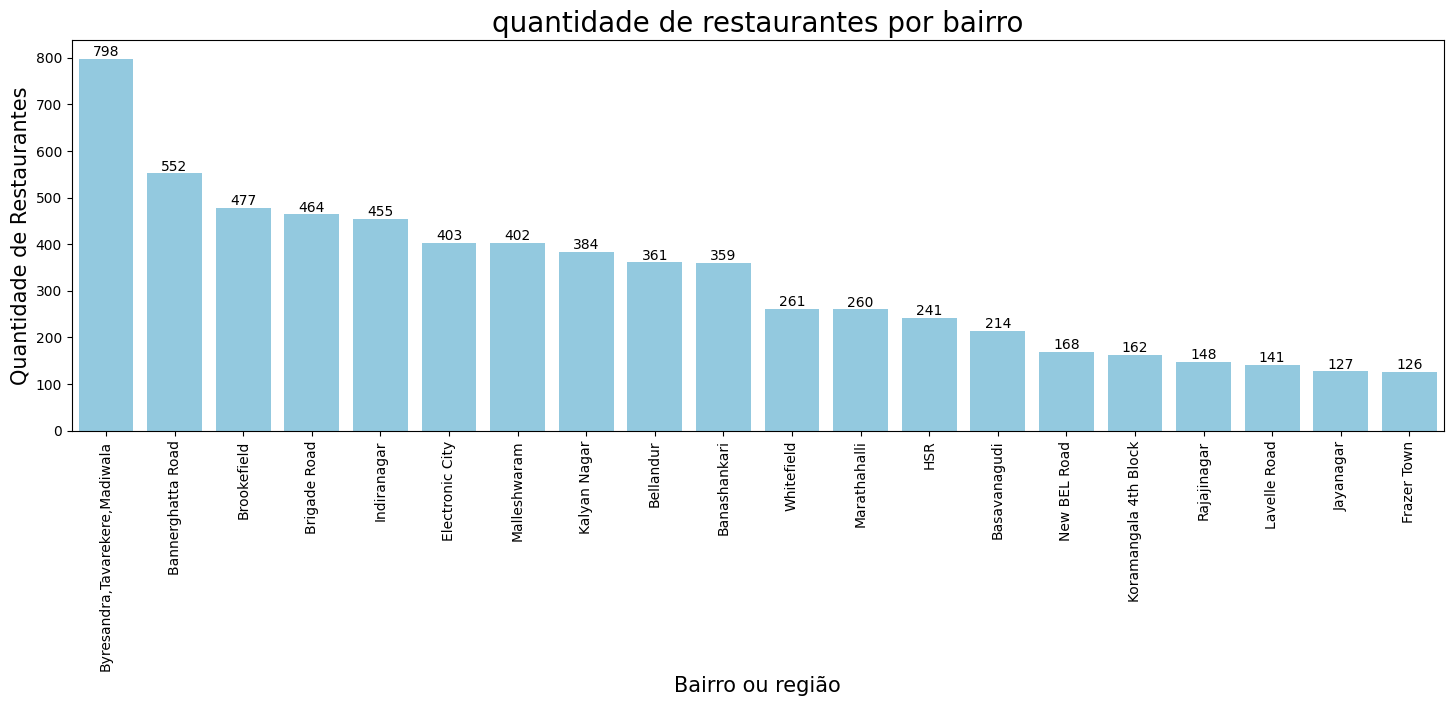

In [17]:
# Gráfico quatidade de restaurantes por bairro
plt.figure(figsize=(15, 5))
ax_1 = sns.barplot(data=qdt_restaurantes_bairro.head(20), x='bairro_(ou_regiao)', y='quantidade_restaurantes', color='skyblue')
plt.title('quantidade de restaurantes por bairro', fontsize=20)
plt.xlabel('Bairro ou região', fontsize=15)
plt.ylabel('Quantidade de Restaurantes', fontsize=15)
plt.tight_layout()
plt.xticks(rotation=90)

# adicionando rótulos
rotulos(ax_1, 'bairro_(ou_regiao)', 'quantidade_restaurantes')
plt.show()

In [18]:
# os 10 tipos de restaurantes mais frequentes
type_restaurant = df.groupby('tipo_restaurante')['nome_restaurante'].count().sort_values(ascending=False).head(10)
type_restaurant = pd.DataFrame(type_restaurant).reset_index()
type_restaurant.columns = ['tipo_restaurante', 'quantidade_restaurantes']
type_restaurant['percentual'] = (type_restaurant['quantidade_restaurantes'] / type_restaurant['quantidade_restaurantes'].sum()) * 100
type_restaurant

,tipo_restaurante,quantidade_restaurantes,percentual
0,Quick Bites,2840,45.673850
1,Casual Dining,1634,26.278546
2,Cafe,403,6.481184
3,Delivery,358,5.757478
4,"Takeaway, Delivery",289,4.647797
5,Dessert Parlor,217,3.489868
6,Bakery,154,2.476681
7,"Casual Dining, Bar",123,1.978128
8,Beverage Shop,118,1.897716
9,Bar,82,1.318752


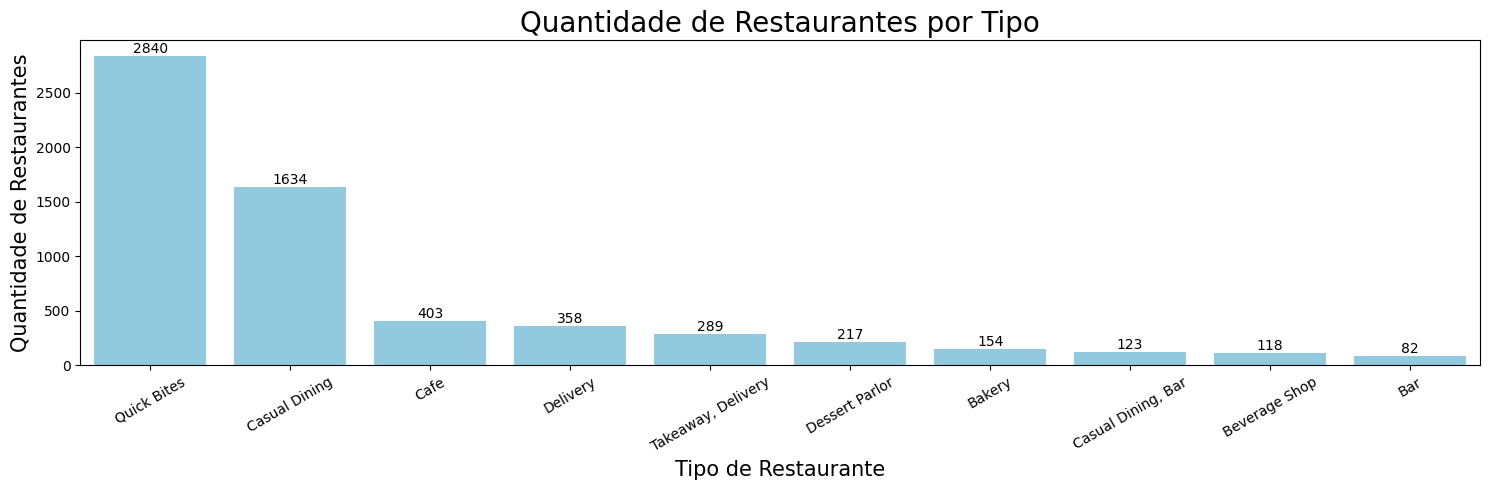

In [19]:
# plotando gráfico quandidade de restaurantes por tipo
plt.figure(figsize=(15, 5))
ax_2 = sns.barplot(data=type_restaurant, x='tipo_restaurante', y='quantidade_restaurantes', color='skyblue')

plt.title('Quantidade de Restaurantes por Tipo', fontsize=20)
plt.xlabel('Tipo de Restaurante', fontsize=15)
plt.ylabel('Quantidade de Restaurantes', fontsize=15)
plt.xticks(rotation=30)  

# Adiciona os rótulos nas barras
rotulos(ax_2, 'tipo_restaurante', 'quantidade_restaurantes')
plt.tight_layout()


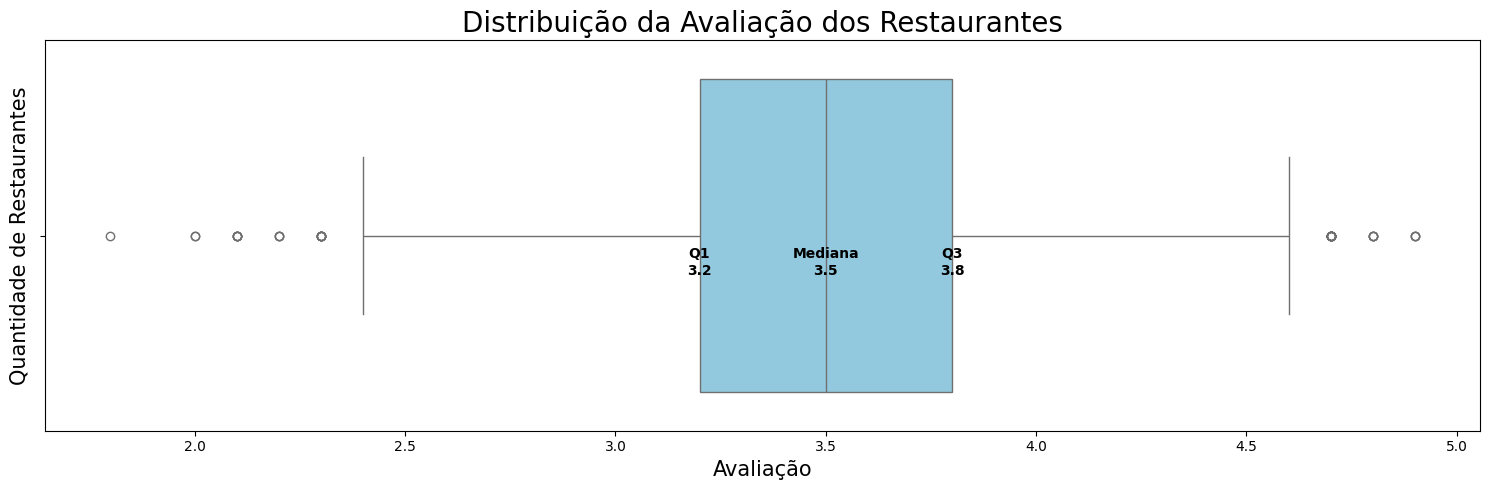

In [20]:
# gráfico de boxplot da avaliação dos restaurantes
plt.figure(figsize=(15, 5))
ax = sns.boxplot(data=df, x='avaliacao_5_pontos', color='skyblue')
plt.title('Distribuição da Avaliação dos Restaurantes', fontsize=20)
plt.xlabel('Avaliação', fontsize=15)
plt.ylabel('Quantidade de Restaurantes', fontsize=15)
plt.tight_layout()

desc = df['avaliacao_5_pontos'].describe()

# Adiciona rótulos dos principais valores
for val, label in zip([desc['25%'], desc['50%'], desc['75%']], ['Q1', 'Mediana', 'Q3']):
    ax.text(val, 0.1, f'{label}\n{val:.1f}', ha='center', color='black', fontsize=10, weight='bold')


C:\Users\adriel\AppData\Local\Temp\ipykernel_12720\2852896885.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_3 = sns.barplot(data=mais_av, x='nome_restaurante', y='num_avaliacoes', palette='viridis')
C:\Users\adriel\AppData\Local\Temp\ipykernel_12720\2852896885.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_4 = sns.barplot(data=menos_av, x='nome_restaurante', y='num_avaliacoes', palette='magma')


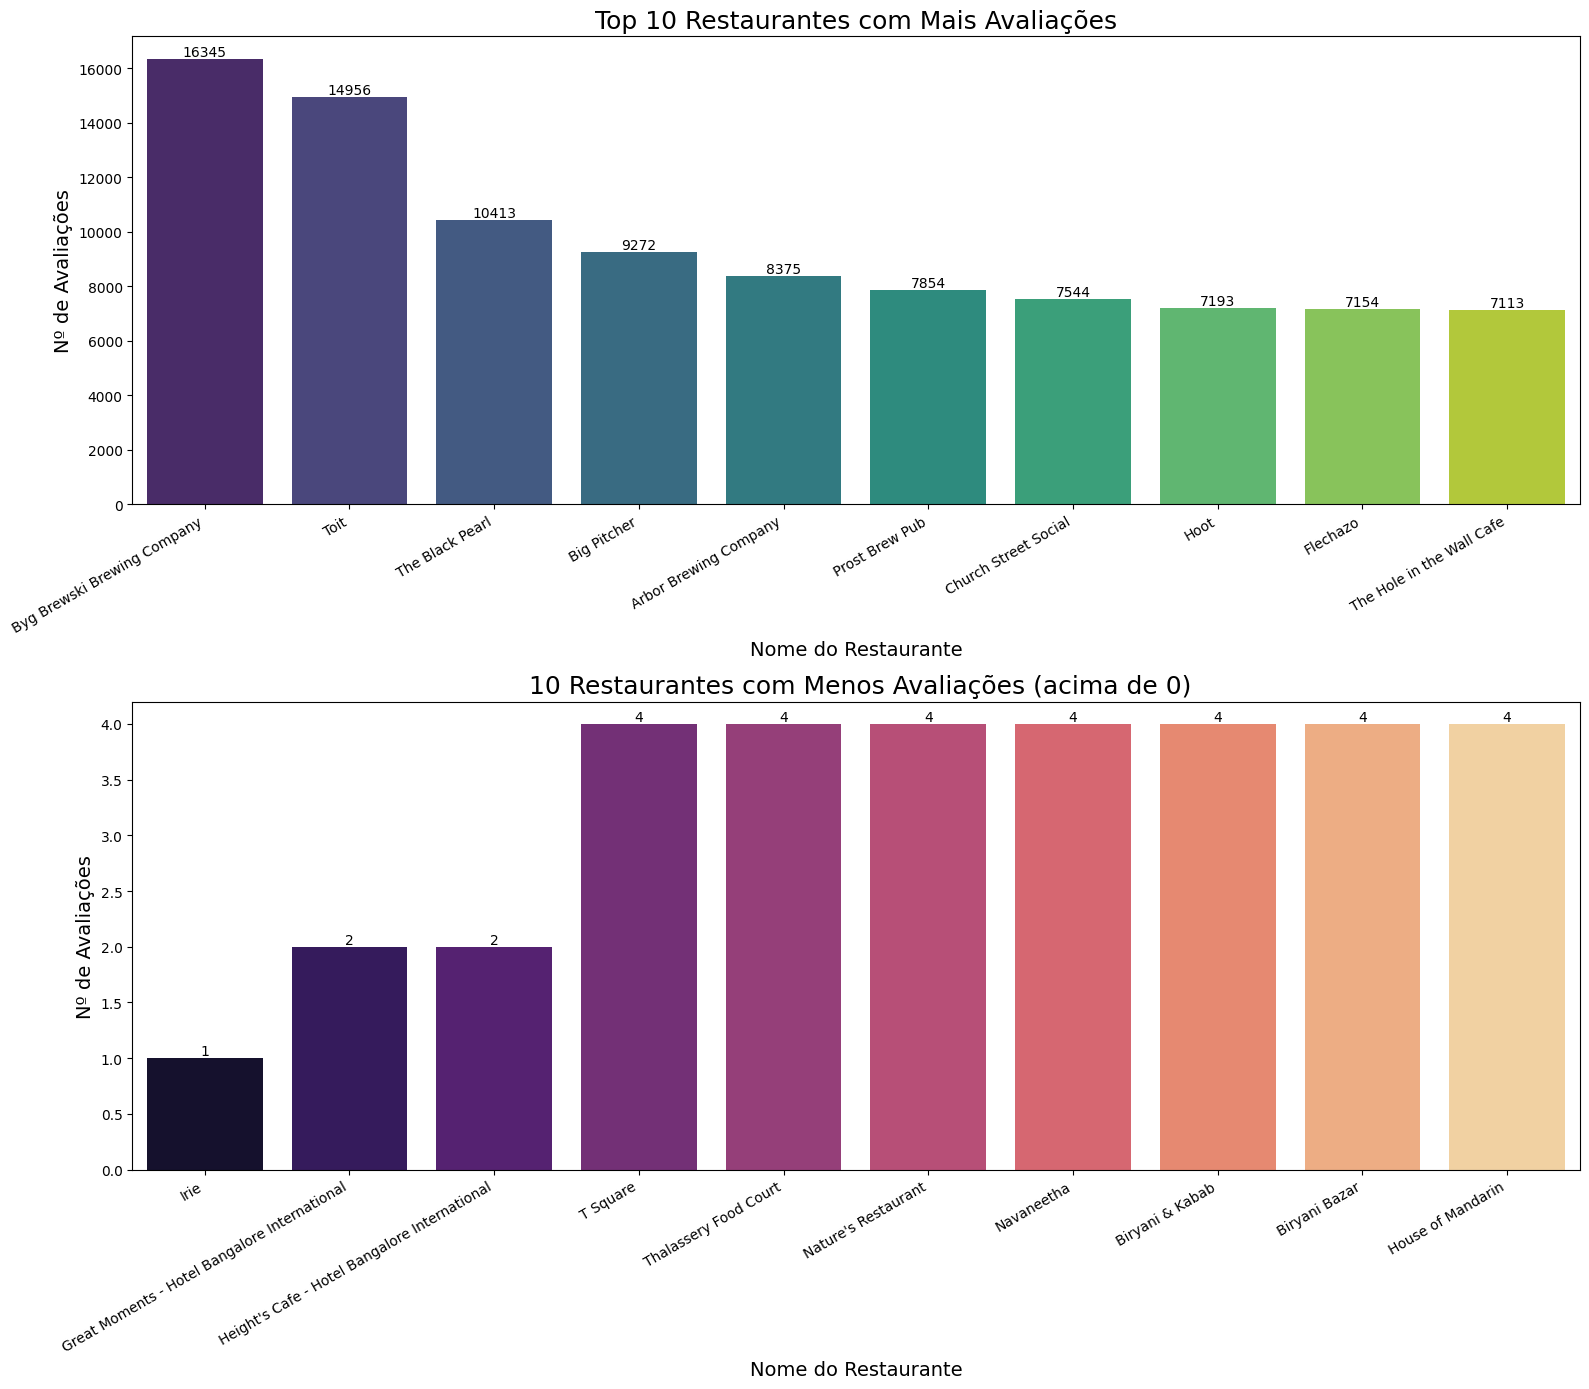

In [21]:
# Top 10 restaurantes com mais avaliações
mais_av = df.groupby('nome_restaurante')['num_avaliacoes'].sum().sort_values(ascending=False).head(10).reset_index()
mais_av.columns = ['nome_restaurante', 'num_avaliacoes']

# Bottom 10 restaurantes com menos avaliações (mas com pelo menos 1 avaliação)
menos_av = df.groupby('nome_restaurante')['num_avaliacoes'].sum()
menos_av = menos_av[menos_av > 0].sort_values(ascending=True).head(10).reset_index()
menos_av.columns = ['nome_restaurante', 'num_avaliacoes']

# Plotando os dois gráficos
plt.figure(figsize=(16, 14))

plt.subplot(2, 1, 1)
ax_3 = sns.barplot(data=mais_av, x='nome_restaurante', y='num_avaliacoes', palette='viridis')
plt.title('Top 10 Restaurantes com Mais Avaliações', fontsize=18)
plt.xlabel('Nome do Restaurante', fontsize=14)
plt.ylabel('Nº de Avaliações', fontsize=14)
plt.xticks(rotation=30, ha='right')
rotulos(ax_3, 'nome_restaurante', 'num_avaliacoes')
plt.tight_layout()

plt.subplot(2, 1, 2)
ax_4 = sns.barplot(data=menos_av, x='nome_restaurante', y='num_avaliacoes', palette='magma')
plt.title(' 10 Restaurantes com Menos Avaliações (acima de 0)', fontsize=18)
plt.xlabel('Nome do Restaurante', fontsize=14)
plt.ylabel('Nº de Avaliações', fontsize=14)
plt.xticks(rotation=30, ha='right')
rotulos(ax_4, 'nome_restaurante', 'num_avaliacoes')
plt.tight_layout()

C:\Users\adriel\AppData\Local\Temp\ipykernel_12720\1846376349.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_5 = sns.barplot(data=custo_medio, x='nome_restaurante', y='custo_medio_2_pessoas', palette='magma')


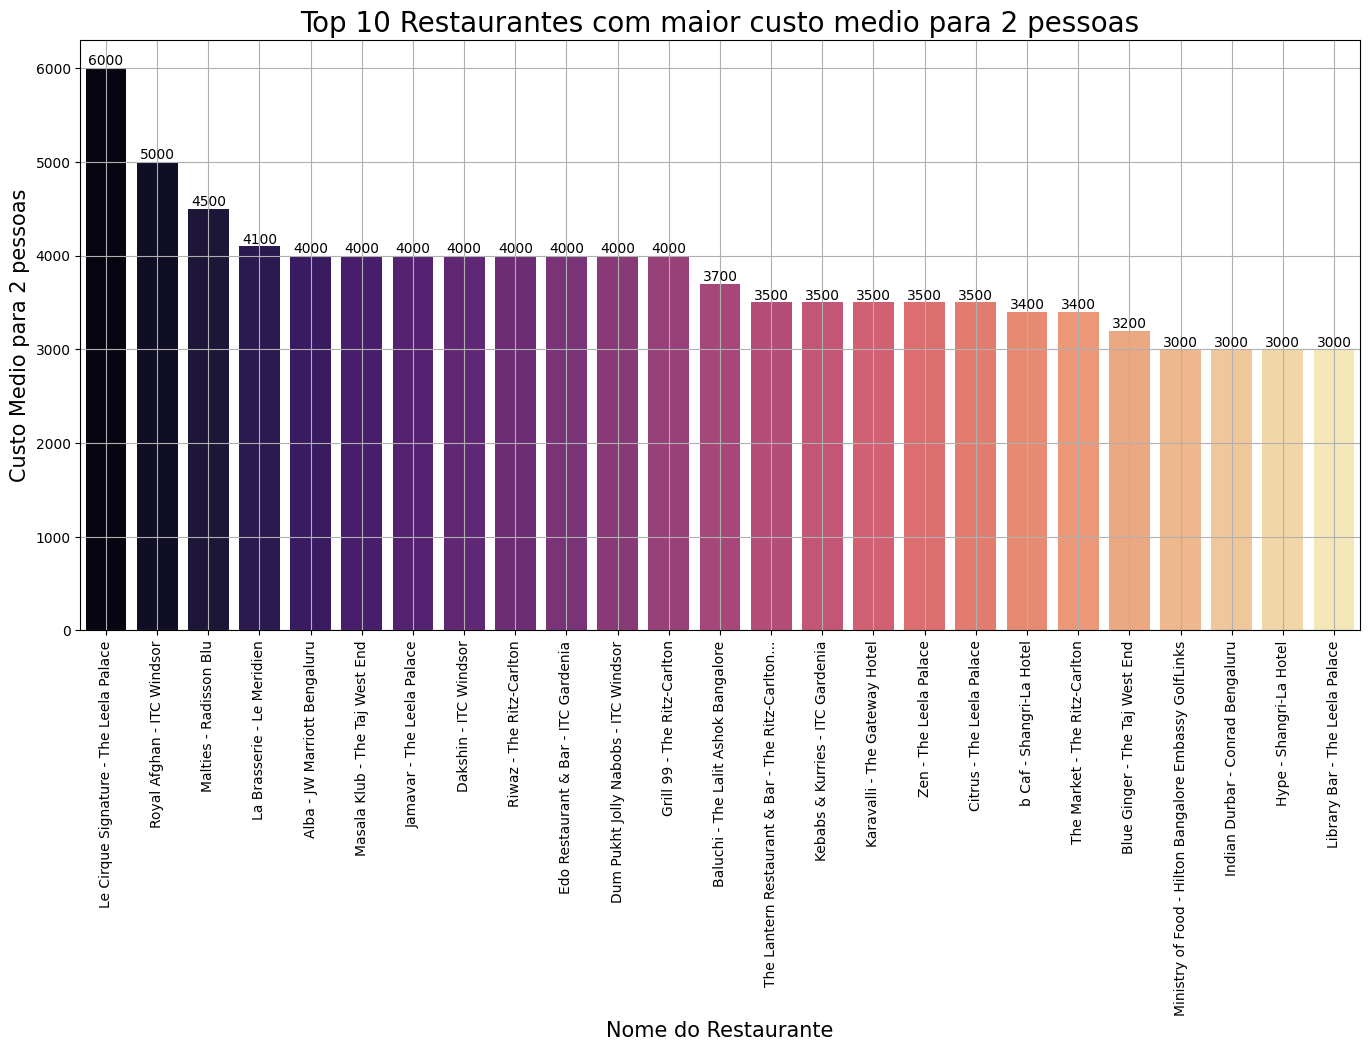

In [22]:
# media custo medio 2 pessoas por restaurante
custo_medio = df.groupby('nome_restaurante')['custo_medio_2_pessoas'].mean().sort_values(ascending=False).head(25)
custo_medio = pd.DataFrame(custo_medio).reset_index()
custo_medio.columns = ['nome_restaurante', 'custo_medio_2_pessoas']


plt.figure(figsize=(15, 7))
ax_5 = sns.barplot(data=custo_medio, x='nome_restaurante', y='custo_medio_2_pessoas', palette='magma')
plt.title('Top 10 Restaurantes com maior custo medio para 2 pessoas', fontsize=20)
plt.xlabel('Nome do Restaurante', fontsize=15)
plt.ylabel('Custo Medio para 2 pessoas', fontsize=15)
plt.tight_layout()
plt.grid()
plt.xticks(rotation=90)


rotulos(ax_5, 'nome_restaurante', 'custo_medio_2_pessoas')


In [23]:
custo_medio['percentual'] = (custo_medio['custo_medio_2_pessoas'] / custo_medio['custo_medio_2_pessoas'].sum()) * 100
custo_medio.tail(10)

,nome_restaurante,custo_medio_2_pessoas,percentual
15,Karavalli - The Gateway Hotel,3500.0,3.691983
16,Zen - The Leela Palace,3500.0,3.691983
17,Citrus - The Leela Palace,3500.0,3.691983
18,b Caf - Shangri-La Hotel,3400.0,3.586498
19,The Market - The Ritz-Carlton,3400.0,3.586498
20,Blue Ginger - The Taj West End,3200.0,3.375527
21,Ministry of Food - Hilton Bangalore Embassy Go...,3000.0,3.164557
22,Indian Durbar - Conrad Bengaluru,3000.0,3.164557
23,Hype - Shangri-La Hotel,3000.0,3.164557
24,Library Bar - The Leela Palace,3000.0,3.164557


C:\Users\adriel\AppData\Local\Temp\ipykernel_12720\821964212.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_6 = sns.barplot(data=cozinha_frequent, x='tipo_cozinha', y='quantidade_restaurantes', palette='magma')


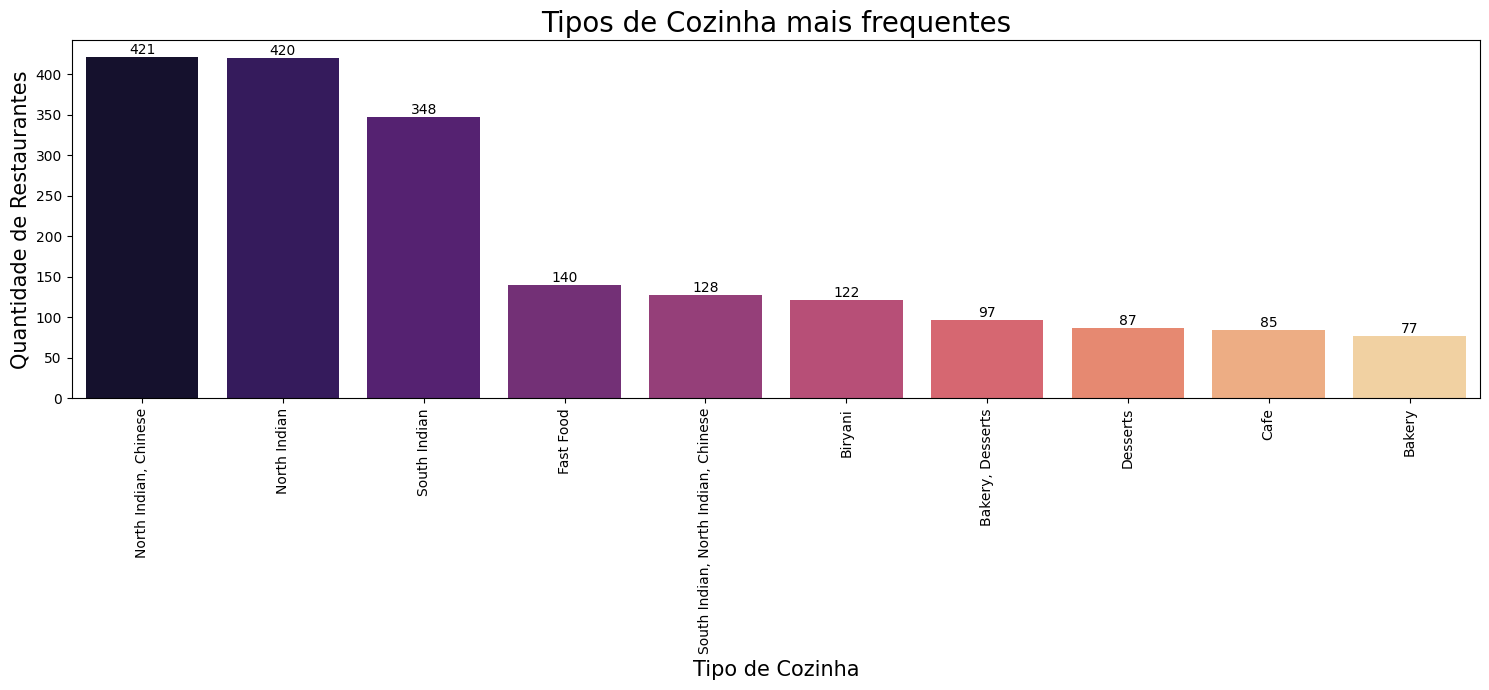

In [24]:
# tipo_cozinha mais frequentes
cozinha_frequent = df['tipo_cozinha'].value_counts().head(10)
cozinha_frequent = pd.DataFrame(cozinha_frequent).reset_index()
cozinha_frequent.columns = ['tipo_cozinha', 'quantidade_restaurantes']
cozinha_frequent['percentual'] = (cozinha_frequent['quantidade_restaurantes'] / cozinha_frequent['quantidade_restaurantes'].sum()) * 100


plt.figure(figsize=(15, 7))
ax_6 = sns.barplot(data=cozinha_frequent, x='tipo_cozinha', y='quantidade_restaurantes', palette='magma')
plt.title('Tipos de Cozinha mais frequentes', fontsize=20)
plt.xlabel('Tipo de Cozinha', fontsize=15)
plt.ylabel('Quantidade de Restaurantes', fontsize=15)
plt.xticks(rotation=90)
rotulos(ax_6, 'tipo_cozinha', 'quantidade_restaurantes')
plt.tight_layout()

In [25]:
cozinha_frequent

,tipo_cozinha,quantidade_restaurantes,percentual
0,"North Indian, Chinese",421,21.870130
1,North Indian,420,21.818182
2,South Indian,348,18.077922
3,Fast Food,140,7.272727
4,"South Indian, North Indian, Chinese",128,6.649351
5,Biryani,122,6.337662
6,"Bakery, Desserts",97,5.038961
7,Desserts,87,4.519481
8,Cafe,85,4.415584
9,Bakery,77,4.000000


In [26]:
# media avaliacoes por tipo de cozinha
df.groupby('tipo_cozinha')['avaliacao_5_pontos'].mean().sort_values(ascending=False).head(20)

tipo_cozinha
Continental, North Indian, Italian, South Indian, Finger Food    4.9
Healthy Food, Salad, Mediterranean                               4.9
Asian, Chinese, Thai, Momos                                      4.9
Continental, European, BBQ, Chinese, Asian                       4.7
BBQ, North Indian, Continental, Chinese                          4.7
Asian, Burmese                                                   4.7
Sushi, Japanese, Chinese, Thai                                   4.7
Italian, American, Pizza                                         4.7
North Indian, European, Mediterranean                            4.7
Chinese, American, Continental, Italian, North Indian            4.7
Asian, Mediterranean, North Indian, BBQ                          4.7
Cafe, American, Burger                                           4.6
Asian, Thai, Vietnamese, Malaysian, Beverages                    4.6
Spanish, Italian, Mediterranean, European, Salad                 4.6
Continental, Finger F

In [27]:
# Quais os tipos de cozinha com mais avaliações e com a maior avaliação de 5 pontos?

# Agrupar por tipo de cozinha e calcular a soma das avaliações
tipy_av = (
    df.groupby('tipo_cozinha')[['num_avaliacoes', 'avaliacao_5_pontos']]
    .agg({'num_avaliacoes': 'sum', 'avaliacao_5_pontos': 'mean'})
    .sort_values(by='num_avaliacoes', ascending=False)
    .head(20)
    .reset_index()
)

# Calcular percentual com base no total de avaliações dos top 20
tipy_av['percentual'] = (tipy_av['num_avaliacoes'] / tipy_av['num_avaliacoes'].sum()) * 100

In [28]:
tipy_av

,tipo_cozinha,num_avaliacoes,avaliacao_5_pontos,percentual
0,North Indian,52717,3.418571,17.161264
1,"North Indian, Chinese",40010,3.342518,13.024682
2,South Indian,35963,3.491667,11.707239
3,"Continental, North Indian, Italian, South Indi...",16345,4.900000,5.320881
4,"North Indian, Mughlai",15604,3.700000,5.079659
5,"Italian, American, Pizza",14956,4.700000,4.868711
6,"North Indian, Continental, Chinese",13076,3.481818,4.256704
7,"North Indian, European, Mediterranean",10413,4.700000,3.389803
8,Cafe,10400,3.581176,3.385571
9,"American, North Indian, Chinese, Finger Food, ...",10317,4.200000,3.358551


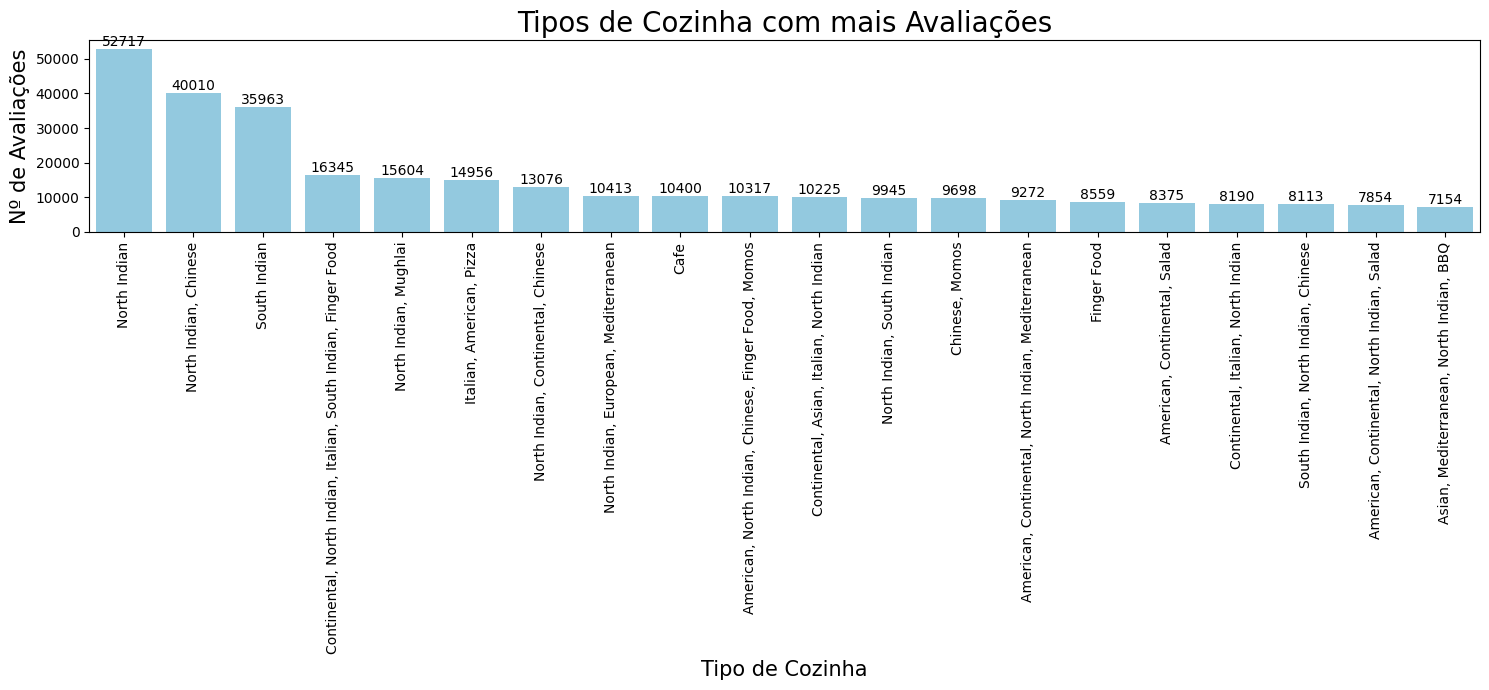

In [29]:
# gráfico tipos de cozinha com mais avaliações
plt.figure(figsize=(15, 7))
ax_7 = sns.barplot(data=tipy_av, x='tipo_cozinha', y='num_avaliacoes', color='skyblue')
plt.title('Tipos de Cozinha com mais Avaliações', fontsize=20)
plt.xlabel('Tipo de Cozinha', fontsize=15)
plt.ylabel('Nº de Avaliações', fontsize=15)
plt.xticks(rotation=90)
rotulos(ax_7, 'tipo_cozinha', 'num_avaliacoes') 
plt.tight_layout()

In [30]:
tipy_av 

,tipo_cozinha,num_avaliacoes,avaliacao_5_pontos,percentual
0,North Indian,52717,3.418571,17.161264
1,"North Indian, Chinese",40010,3.342518,13.024682
2,South Indian,35963,3.491667,11.707239
3,"Continental, North Indian, Italian, South Indi...",16345,4.900000,5.320881
4,"North Indian, Mughlai",15604,3.700000,5.079659
5,"Italian, American, Pizza",14956,4.700000,4.868711
6,"North Indian, Continental, Chinese",13076,3.481818,4.256704
7,"North Indian, European, Mediterranean",10413,4.700000,3.389803
8,Cafe,10400,3.581176,3.385571
9,"American, North Indian, Chinese, Finger Food, ...",10317,4.200000,3.358551


## Perguntas Estratégicas

A seguir estão perguntas analíticas elaboradas com base nos dados da plataforma Zomato:

1. **Quais bairros concentram o maior número de restaurantes?**
2. **Quais os tipos de cozinha mais presentes nos restaurantes?**
3. **Quais os tipos de cozinha com mais avaliações e com a maior avaliação de 5 pontos?**
4. **Existe relação entre tipo de restaurante e avaliação média?**
5. **Como se distribuem as avaliações dos restaurantes?**
6. **Quais restaurantes cobram os maiores valores médios para duas pessoas?**
7. **Existe concentração de cozinhas específicas em certos bairros?**
8. **Qual é a relação entre número de avaliações e nota média?**
9. **Há outliers em custo ou avaliação?**


C:\Users\adriel\AppData\Local\Temp\ipykernel_12720\2964292826.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avaliacoes_por_tipo.values, y=avaliacoes_por_tipo.index, palette='viridis')


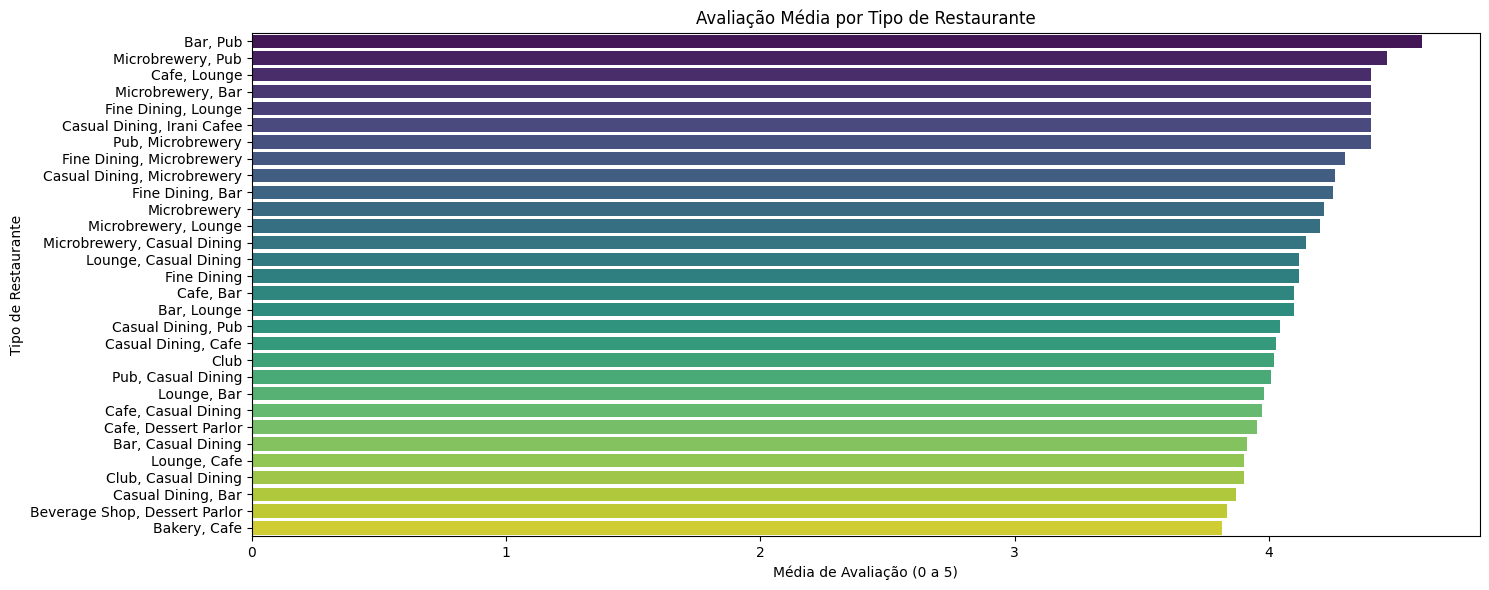

In [31]:
# Existe relação entre tipo de restaurante e avaliação média?
plt.figure(figsize=(15, 6))
avaliacoes_por_tipo = df.groupby('tipo_restaurante')['avaliacao_5_pontos'].mean().sort_values(ascending=False).head(30)

sns.barplot(x=avaliacoes_por_tipo.values, y=avaliacoes_por_tipo.index, palette='viridis')
plt.xlabel('Média de Avaliação (0 a 5)')
plt.ylabel('Tipo de Restaurante')
plt.title('Avaliação Média por Tipo de Restaurante')
plt.tight_layout()


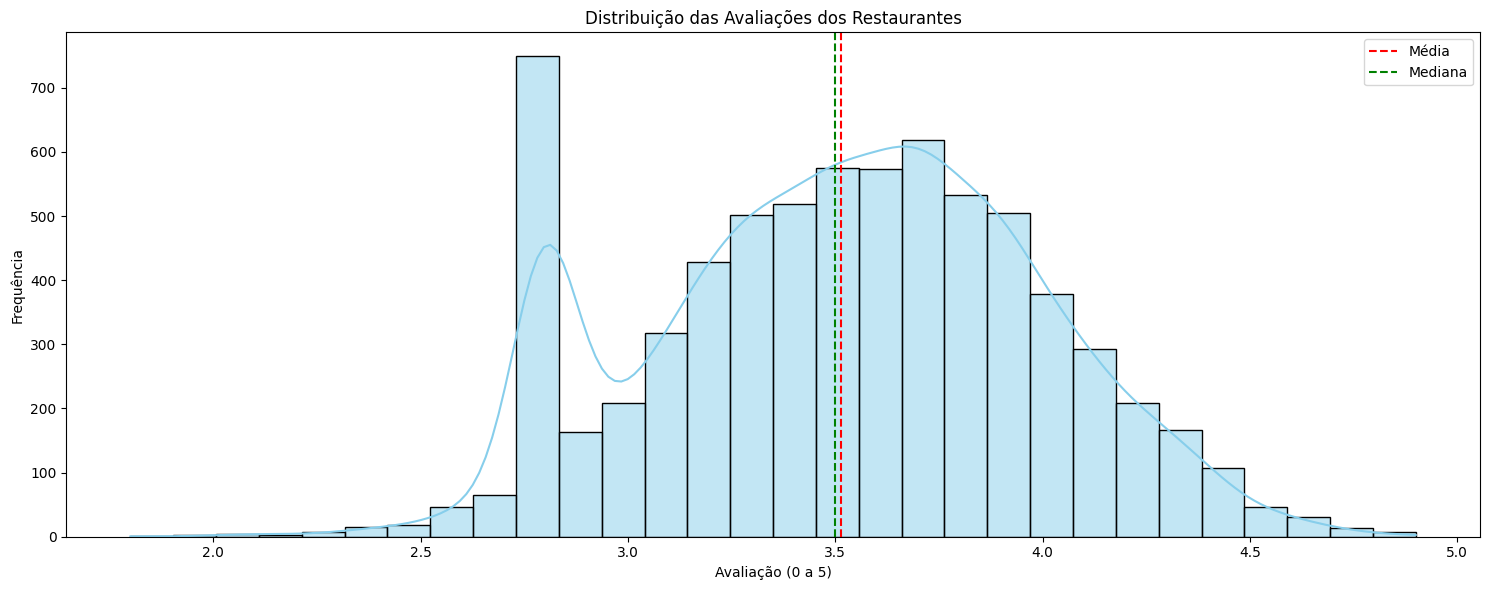

In [32]:
# Como se distribuem as avaliações dos restaurantes?
# histograma com densidade
plt.figure(figsize=(15, 6)) 
sns.histplot(df['avaliacao_5_pontos'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição das Avaliações dos Restaurantes')
plt.xlabel('Avaliação (0 a 5)')
plt.ylabel('Frequência')    
plt.axvline(df['avaliacao_5_pontos'].mean(), color='red', linestyle='--', label='Média')
plt.axvline(df['avaliacao_5_pontos'].median(), color='green', linestyle='--', label='Mediana')  
plt.legend()
plt.tight_layout()


C:\Users\adriel\AppData\Local\Temp\ipykernel_12720\918344957.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


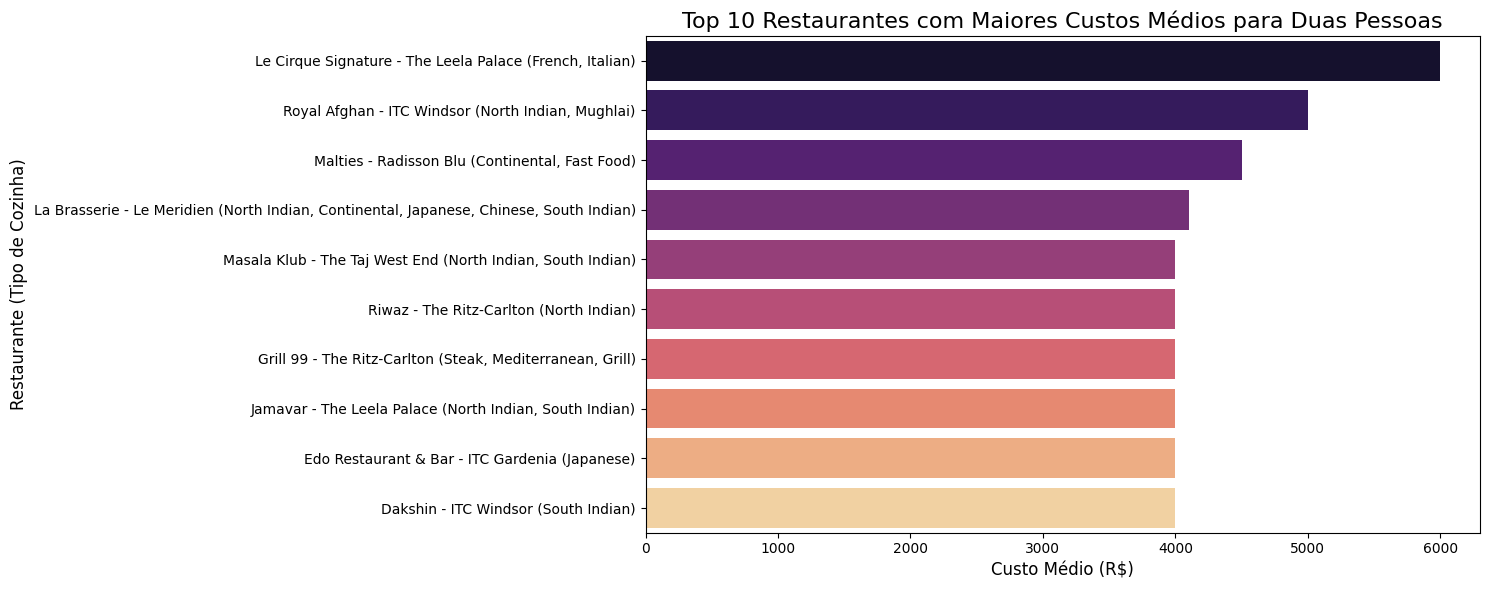

In [ ]:
# Agrupa os dados e ordena pelo custo médio
custo_medio = df.groupby(['nome_restaurante', 'tipo_cozinha'])['custo_medio_2_pessoas'].mean().sort_values(ascending=False).head(10).reset_index()
custo_medio['restaurante_cozinha'] = custo_medio['nome_restaurante'] + ' (' + custo_medio['tipo_cozinha'] + ')'

plt.figure(figsize=(15, 6))
sns.barplot(
    x='custo_medio_2_pessoas',
    y='restaurante_cozinha',
    data=custo_medio,
    palette='magma'
)
plt.title('Top 10 Restaurantes com Maiores Custos Médios para Duas Pessoas', fontsize=16)
plt.xlabel('Custo Médio (R$)', fontsize=12)
plt.ylabel('Restaurante (Tipo de Cozinha)', fontsize=12)
plt.tight_layout()


In [34]:
custo_medio

nome_restaurante
Le Cirque Signature - The Leela Palace    6000.0
Royal Afghan - ITC Windsor                5000.0
Malties - Radisson Blu                    4500.0
La Brasserie - Le Meridien                4100.0
Alba - JW Marriott Bengaluru              4000.0
Masala Klub - The Taj West End            4000.0
Jamavar - The Leela Palace                4000.0
Dakshin - ITC Windsor                     4000.0
Riwaz - The Ritz-Carlton                  4000.0
Edo Restaurant & Bar - ITC Gardenia       4000.0
Name: custo_medio_2_pessoas, dtype: float64

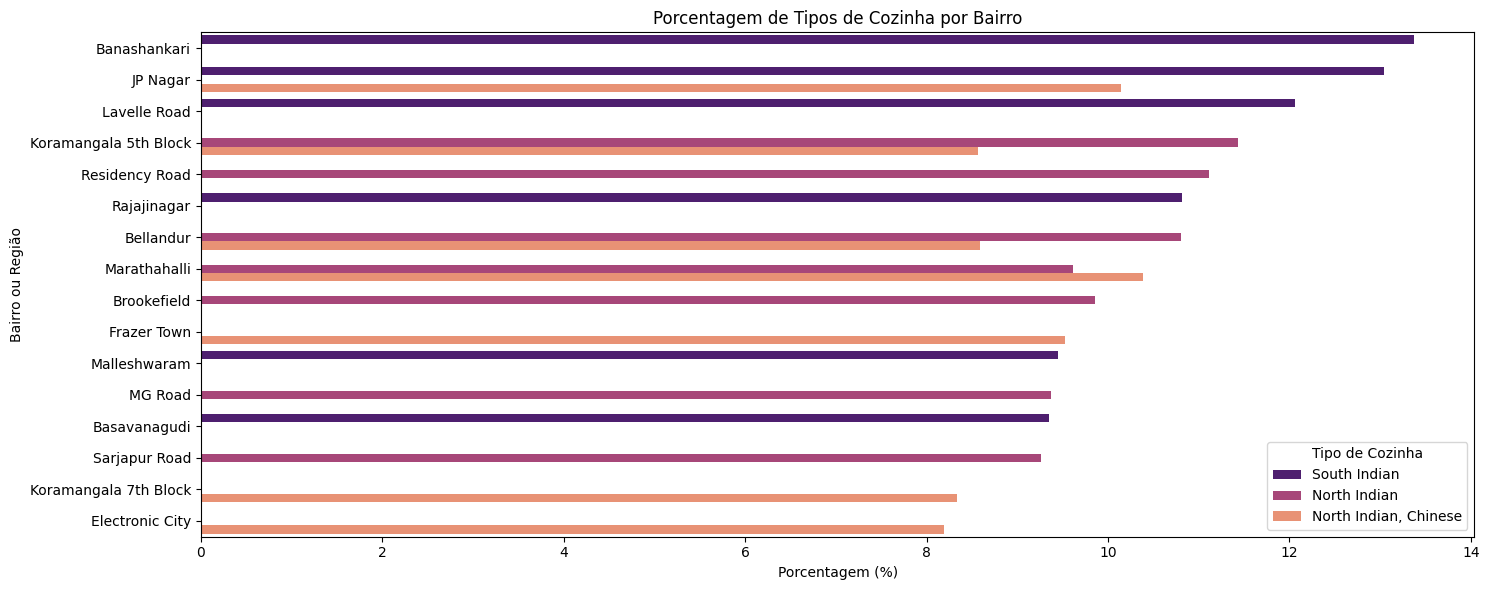

In [ ]:
# Agrupar e contar a quantidade de restaurantes por bairro e tipo de cozinha
cozinha_bairro = df.groupby(['bairro_(ou_regiao)', 'tipo_cozinha']).size().reset_index(name='quantidade')

# Calcular o total de restaurantes por bairro
total_por_bairro = cozinha_bairro.groupby('bairro_(ou_regiao)')['quantidade'].sum().reset_index(name='total_bairro')

# Juntar com a tabela principal
cozinha_bairro = cozinha_bairro.merge(total_por_bairro, on='bairro_(ou_regiao)')

# Calcular a porcentagem
cozinha_bairro['percentual'] = (cozinha_bairro['quantidade'] / cozinha_bairro['total_bairro']) * 100

# (Opcional) ordenar pelos mais representativos
cozinha_bairro = cozinha_bairro.sort_values(by='percentual', ascending=False)

# Visualização dos 20 maiores casos de concentração
plt.figure(figsize=(15, 6))
top_20 = cozinha_bairro.head(20)
sns.barplot(x='percentual', y='bairro_(ou_regiao)', hue='tipo_cozinha', data=top_20, palette='magma')
plt.title('Porcentagem de Tipos de Cozinha por Bairro')
plt.xlabel('Porcentagem (%)')
plt.ylabel('Bairro ou Região')
plt.legend(title='Tipo de Cozinha')
plt.tight_layout()

In [36]:
df.head(0)

,nome_restaurante,tipo_restaurante,avaliacao_5_pontos,num_avaliacoes,custo_medio_2_pessoas,pedido_online,reserva_mesa,tipo_cozinha,bairro_(ou_regiao),endereco


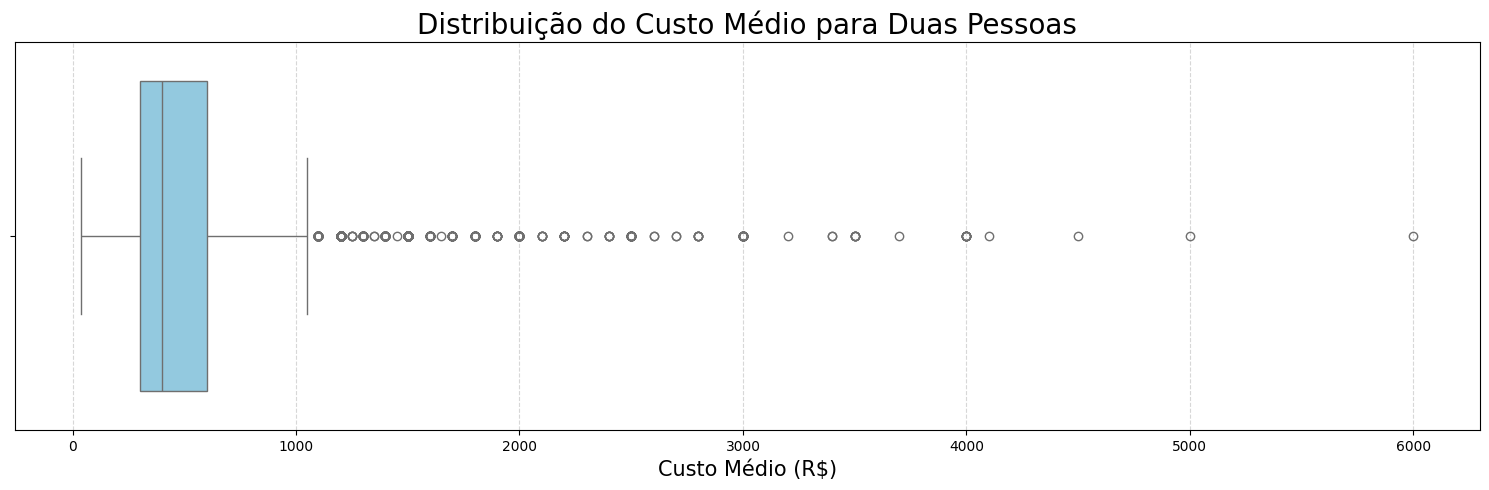

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de boxplot do custo médio para duas pessoas
plt.figure(figsize=(15, 5))
ax_8 = sns.boxplot(data=df, x='custo_medio_2_pessoas', color='skyblue')

plt.title('Distribuição do Custo Médio para Duas Pessoas', fontsize=20)
plt.xlabel('Custo Médio (R$)', fontsize=15)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()



In [38]:
# Estatísticas descritivas (Q1, Mediana e Q3)
desc_2 = df['custo_medio_2_pessoas'].describe().loc[['25%', '50%', '75%']]
desc_2 = pd.DataFrame(desc_2)
desc_2.columns = ['Custo Médio (R$)']
desc_2 = desc_2.astype({'Custo Médio (R$)': int})  # Converte para inteiro

# Adicionando nomes das estatísticas
desc_2['Estatística'] = ['Quartil (25%)', 'Mediana (50%)', 'Quartil (75%)']

desc_2 = desc_2[['Estatística', 'Custo Médio (R$)']]
desc_2

,Estatística,Custo Médio (R$)
25%,Quartil (25%),300
50%,Mediana (50%),400
75%,Quartil (75%),600


In [ ]:
# padronizando dados para exportar

df_copy = df.copy()
df_copy['custo_medio_2_pessoas'] = df_copy['custo_medio_2_pessoas'].astype(str)
df_copy['avaliacao_5_pontos'] = df_copy['avaliacao_5_pontos'].astype(str)
df_copy['custo_medio_2_pessoas'] = df_copy['custo_medio_2_pessoas'].str.replace('.', ',', regex=False)
df_copy['avaliacao_5_pontos'] = df_copy['avaliacao_5_pontos'].str.replace('.', ',', regex=False)
df_copy.to_csv('zomato_cleaned.csv', index=False, encoding='utf-8')

---

# Conclusão

A análise dos dados dos restaurantes da Zomato em Bangalore permitiu identificar tendências relevantes sobre o mercado gastronômico local. Destacam-se os seguintes pontos:

- A maioria dos restaurantes está concentrada em poucas regiões específicas, o que pode indicar polos gastronômicos bem definidos.
- Restaurantes que oferecem múltiplos tipos de culinária tendem a ter maior popularidade, principalmente quando combinam culinárias indianas com internacionais.
- A média de avaliações está concentrada em faixas entre 3.5 e 4.5 estrelas, o que mostra um padrão de qualidade relativamente estável.
- A maioria dos estabelecimentos está na faixa de preço mais acessível, indicando um foco maior em refeições populares.
- Algumas localidades concentram os restaurantes mais caros e melhor avaliados, o que pode interessar a investidores ou gestores do setor.

Este projeto serviu como uma excelente oportunidade para aplicar técnicas de análise exploratória com Python e desenvolver insights que podem ser utilizados em estratégias de marketing, expansão comercial ou planejamento urbano.

---

## Próximos passos

- Criar dashboards interativos no Power BI ou Tableau com esses dados.
- Aplicar modelos de clusterização para segmentar restaurantes por perfil.
- Explorar tendências temporais se houver dados históricos (não presentes nesta base).
- Enriquecer os dados com outras fontes, como demografia ou dados econômicos da região.

---

💡 Obrigado por acompanhar!  
Se curtiu, deixa uma ⭐️ no repositório e me segue pra ver outros projetos de análise de dados!
